In [27]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import pylab as pl
from scipy.stats import linregress
from scipy import stats

import seaborn as sns
# Store filepath in a variable

In [28]:
df = pd.read_csv("SF_FINAL.csv")
df.head()
total_rows = df.count()


In [29]:
df.columns
max(total_rows)

22273

In [30]:
n=max(total_rows)
x = df['Income']

In [31]:
y=df['inspection_score']

In [32]:
ir=IsotonicRegression()

In [33]:
y_ = ir.fit_transform(x, y)

In [34]:
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))


RuntimeError: Can not put single artist in more than one figure

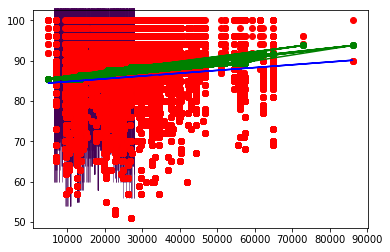

In [11]:
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Household Income vs Restaurant Inspections (SF)')
plt.show()

fig.savefig('SF_graph.png')

NameError: name 'set_xlim' is not defined

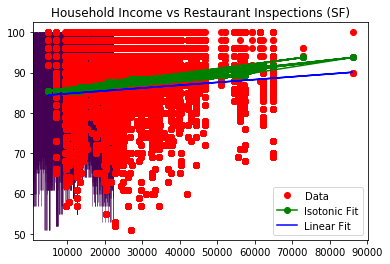

In [36]:
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Household Income vs Restaurant Inspections (SF)')

plt.show()



In [53]:
X = df["Income"].values.reshape(-1, 1)
y = df["inspection_score"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (22273, 1) (22273, 1)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [55]:
X = X_test
y = y_test
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
plt.savefig("SF_Stats.png")
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     41.61
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           1.21e-10
Time:                        21:39:59   Log-Likelihood:                -19876.
No. Observations:                5569   AIC:                         3.976e+04
Df Residuals:                    5567   BIC:                         3.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.2653      0.273    308.550      0.000      83.730      84.801
x1          6.537e-05   1.01e-05      6.451      0.000    4.55e-05    8.52e-05
==============================================================================
Omnibus:                      456.287   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.844
Skew:                          -0.742   Prob(JB):                    2.02e-126
Kurtosis:                       3.543   Cond. No.                     6.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 432x288 with 0 Axes>

/anaconda3/envs/Avengers/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


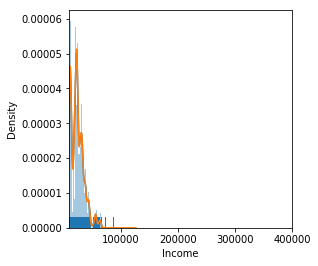

In [57]:
sns.distplot(df["Income"], hist=True, rug=True)
#plt.savefig("Histo_Kernel_Wins.png")

df["Income"].plot(kind="density",  # Create density plot
                     figsize=(4,4),    # Set figure size
                     xlim= (10000, 400000))      # Limit x axis values

/anaconda3/envs/Avengers/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


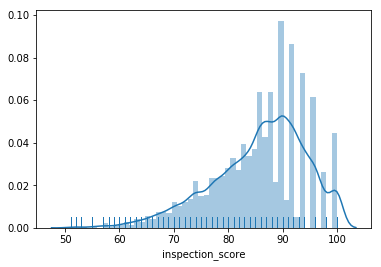

In [59]:
sns.distplot(df["inspection_score"], hist=True, rug=True)